In [ ]:
import numpy as np
import pandas as pd
import time

np.random.seed(2)  # reproducible


N_STATES = 51   # the length of the 1 dimensional world
ACTIONS = ['up', 'down']     # available actions
EPSILON = 0.9   # greedy policy
ALPHA = 0.1     # learning rate
GAMMA = 0.9    # discount factor
MAX_EPISODES = 1000   # maximum episodes
FRESH_TIME = 0.1    # fresh time for one move


def build_q_table(n_states, actions):
  table = pd.DataFrame(
    np.zeros((n_states, len(actions))),     # q_table initial values
    columns=actions,    # actions's name
  )
  # print(table)    # show table
  return table


def choose_action(state, q_table):
  # This is how to choose an action
  state_actions = q_table.iloc[state, :]
  if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):  # act non-greedy or state-action have no value
    action_name = np.random.choice(ACTIONS)
  else:   # act greedy
    action_name = state_actions.idxmax()    # replace argmax to idxmax as argmax means a different function in newer version of pandas
  return action_name


def get_env_feedback(S, A, best_reward):
  # This is how agent will interact with the environment
  if A == 'up':    # move up
    if S == N_STATES - 1:   # wall
      S_ = S
    else:
      S_ = S + 1
  else:   # move down
    if S == 0:
      S_ = S  # reach the wall
    else:
      S_ = S - 1


  ###########reward
  ###########playground dimension: 100(50+50)*50, bottom left(n1) to upper right(n2)
  n1=1
  n2=1.3

  dl1=np.sqrt(50**2.0+S_**2.0)
  dl2=np.sqrt(50**2.0+(50.0-S_)**2.0)
  t=dl1*n1+dl2*n2
  R = 1/t**2*(50*100*100)**2

  check = False
  if R >= best_reward:
    best_reward = R
    check = True

  print('(State,reward) = ',S_,R,check)

  #if check==True:
    #time.sleep(1)
  return S_,R,best_reward



def rl():
  # main part of RL loop
  q_table = build_q_table(N_STATES, ACTIONS)
  for episode in range(MAX_EPISODES):
    step_counter = 0
    S = 0
    best_reward = 0
    is_terminated = False
    print('episode: ',episode)
    while not is_terminated:

      A = choose_action(S, q_table)
      S_, R,best_reward = get_env_feedback(S, A,best_reward)  # take action & get next state and reward
      q_predict = q_table.loc[S, A]
      if S_ != 'terminal':
        q_target = R + GAMMA * q_table.iloc[S_, :].max()   # next state is not terminal
      else:
        q_target = R     # next state is terminal
        is_terminated = True    # terminate this episode

      q_table.loc[S, A] += ALPHA * (q_target - q_predict)  # update
      S = S_  # move to next state
      #step_counter += 1
  return q_table
    


if __name__ == "__main__":
  q_table = rl()
  print('\r\nQ-table:\n')
print(q_table)

串流輸出內容已截斷至最後 5000 行。
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  28 15182781.07262781 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 15187119.329289239 True
(State,reward) =  30 15183570.333974276 False
(State,reward) =  29 151

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import time

np.random.seed(2)  # reproducible


N_STATES = (51,51)   # the length of the 1 dimensional world
ACTIONS = [0,1,2,3]  #['up0', 'down0','up1','down1']     # available actions
EPSILON = 0.9   # greedy policy
#EPSILON = 0.9   # greedy policy
ALPHA = 0.001     # learning rate
GAMMA = 0.9    # discount factor
MAX_EPISODES = 1000   # maximum episodes
FRESH_TIME = 0.1    # fresh time for one move


def build_q_table(n_states, actions):
  table = np.zeros((n_states[0],n_states[1], len(actions)))     # q_table initial values
  # print(table)    # show table
  return table


def choose_action(state, q_table):
  # This is how to choose an action
  state_actions = q_table[state[0],state[1],:]
  if (np.random.uniform() > EPSILON) or (np.all(state_actions == 0)):  # act non-greedy or state-action have no value
    action_name = np.random.choice(ACTIONS)
  else:   # act greedy
    action_name = state_actions.argmax()      # replace argmax to idxmax as argmax means a different function in newer version of pandas
  return action_name


def get_env_feedback(S, A, best_reward):
  # This is how agent will interact with the environment
  S_ = S
  if A == 0:    #up0
    if S[0] == N_STATES[1] - 1:   # wall
      S_ = S
    else:
      S_[0] = S[0] + 1
  if A == 2:   #up1
    if S[1] == N_STATES[1] - 1:   # wall
      S_ = S
    else:
      S_[1] = S[1] + 1
    
  if A == 1:     #down0
    if S[0] == 0:
      S_ = S  # reach the wall
    else:
      S_[0] = S[0] - 1
  
  if A == 3:  #down1
    if S[1] == 0:
      S_ = S  # reach the wall
    else:
      S_[1] = S[1] - 1


  ###########reward
  ###########playground dimension: 150(50+50+50)*50, bottom left(n1) to upper right(n3)
  #'''
  n1=1
  n2=1.3
  n3=3
  #'''
  #n1=1.6
  #n2=1
  #n3=1.3

  dl1=np.sqrt(50**2.0+S_[0]**2.0)
  dl2=np.sqrt(50**2.0+(S_[0]-S_[1])**2.0)
  dl3=np.sqrt(50**2.0+(50.0-S_[1])**2.0)
  t=dl1*n1+dl2*n2+dl3*n3
  R_score = 1/t**2*(50*150*100)**2

  R = R_score - best_reward[2]

  check = False
  if R_score >= best_reward[2]:
    best_reward[0] = S_[0]
    best_reward[1] = S_[1]
    best_reward[2] = R_score
    R += 9000
    check = True

  print('(State,reward) = ',S_,R_score,check,best_reward)

  #if check==True:
    #time.sleep(1)
  return S_,R,best_reward



def rl():
  # main part of RL loop
  q_table = build_q_table(N_STATES, ACTIONS)
  for episode in range(MAX_EPISODES):
    step_counter = 0
    S = np.array([0,0])
    best_reward = np.array([0,0,0])
    is_terminated = False
    print('episode: ',episode)
    while not is_terminated:

      A = choose_action(S, q_table)
      S_, R,best_reward = get_env_feedback(S, A,best_reward)  # take action & get next state and reward
      q_predict = q_table[S[0],S[1],A]
      if S_ != 'terminal':
        q_target = R + GAMMA * q_table[S_[0],S_[1],:].max()   # next state is not terminal
      else:
        q_target = R     # next state is terminal
        is_terminated = True    # terminate this episode

      q_table[S[0],S[1],A] += ALPHA * (q_target - q_predict)  # update
      S = S_  # move to next state
      #step_counter += 1
  return q_table
    


if __name__ == "__main__":
  q_table = rl()
  print('\r\nQ-table:\n')
print(q_table)

episode:  0
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.414934002 True [      0       0 5256254]
(State,reward) =  [0 0] 5256254.4149340

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


 [     25      43 7360286]
(State,reward) =  [25 43] 7360286.699136121 True [     25      43 7360286]
(State,reward) =  [26 43] 7358962.403252756 False [     25      43 7360286]
(State,reward) =  [25 43] 7360286.699136121 True [     25      43 7360286]
(State,reward) =  [24 43] 7359696.036155151 False [     25      43 7360286]
(State,reward) =  [25 43] 7360286.699136121 True [     25      43 7360286]
(State,reward) =  [26 43] 7358962.403252756 False [     25      43 7360286]
(State,reward) =  [25 43] 7360286.699136121 True [     25      43 7360286]
(State,reward) =  [24 43] 7359696.036155151 False [     25      43 7360286]
(State,reward) =  [24 44] 7355140.376108776 False [     25      43 7360286]
(State,reward) =  [25 44] 7356860.416831107 False [     25      43 7360286]
(State,reward) =  [24 44] 7355140.376108776 False [     25      43 7360286]
(State,reward) =  [25 44] 7356860.416831107 False [     25      43 7360286]
(State,reward) =  [24 44] 7355140.376108776 False [     25      4

KeyboardInterrupt: ignored

In [2]:
import numpy as np
import time

np.random.seed(2)  # reproducible


N_STATES = (51,51)   # the length of the 1 dimensional world
ACTIONS = [0,1,2,3]  #['up0', 'down0','up1','down1']     # available actions
EPSILON = 0.9   # greedy policy
#EPSILON = 0.9   # greedy policy
ALPHA = 0.001     # learning rate
GAMMA = 0.9    # discount factor
MAX_EPISODES = 100   # maximum episodes
max_steps = 300
FRESH_TIME = 0.1    # fresh time for one move
reward_table = np.zeros((MAX_EPISODES,max_steps,4)) #reward,state1,state2,t


def build_q_table(n_states, actions):
  table = np.zeros((n_states[0],n_states[1], len(actions)))     # q_table initial values
  # print(table)    # show table
  return table


def choose_action(state, q_table):
  # This is how to choose an action
  state_actions = q_table[state[0],state[1],:]
  if (np.random.uniform() > EPSILON) or (np.all(state_actions == 0)):  # act non-greedy or state-action have no value
    action_name = np.random.choice(ACTIONS)
  else:   # act greedy
    action_name = state_actions.argmax()      # replace argmax to idxmax as argmax means a different function in newer version of pandas
  return action_name


def get_env_feedback(S, A, best_reward):
  # This is how agent will interact with the environment
  S_ = S
  if A == 0:    #up0
    if S[0] == N_STATES[1] - 1:   # wall
      S_ = S
    else:
      S_[0] = S[0] + 1
  if A == 2:   #up1
    if S[1] == N_STATES[1] - 1:   # wall
      S_ = S
    else:
      S_[1] = S[1] + 1
    
  if A == 1:     #down0
    if S[0] == 0:
      S_ = S  # reach the wall
    else:
      S_[0] = S[0] - 1
  
  if A == 3:  #down1
    if S[1] == 0:
      S_ = S  # reach the wall
    else:
      S_[1] = S[1] - 1


  ###########reward
  ###########playground dimension: 150(50+50+50)*50, bottom left(n1) to upper right(n3)
  #'''
  n1=1
  n2=1.3
  n3=1.6
  #'''
  #n1=1.6
  #n2=1
  #n3=1.3

  dl1=np.sqrt(50**2.0+S_[0]**2.0)
  dl2=np.sqrt(50**2.0+(S_[0]-S_[1])**2.0)
  dl3=np.sqrt(50**2.0+(50.0-S_[1])**2.0)
  t=dl1*n1+dl2*n2+dl3*n3
  R_score = 1/t**2*(50*150*100)**2

  R = R_score - best_reward[2]

  check = False
  if R_score >= best_reward[2]:
    best_reward[0] = S_[0]
    best_reward[1] = S_[1]
    best_reward[2] = R_score
    R += 9000
    check = True

  print('(State,reward) = ',S_,R_score,check,best_reward)

  #if check==True:
    #time.sleep(1)
  return S_,R,best_reward,R_score,t



def rl():
  # main part of RL loop
  q_table = build_q_table(N_STATES, ACTIONS)
  for episode in range(MAX_EPISODES):
    S = np.array([0,0])
    best_reward = np.array([0,0,0])
    print('episode: ',episode)
    for step in range(max_steps):

      A = choose_action(S, q_table)
      S_, R, best_reward, R_score, t= get_env_feedback(S, A,best_reward)  # take action & get next state and reward
      reward_table[episode,step] = np.array([R_score,S[0],S[1],t])
      q_predict = q_table[S[0],S[1],A]
      if S_ != 'terminal':
        q_target = R + GAMMA * q_table[S_[0],S_[1],:].max()   # next state is not terminal
      else:
        q_target = R     # next state is terminal

      q_table[S[0],S[1],A] += ALPHA * (q_target - q_predict)  # update
      S = S_  # move to next state

  return q_table
    


if __name__ == "__main__":
  q_table = rl()
  print('\r\nQ-table:\n')
print(q_table)

episode:  0
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0        0 10807637]
(State,reward) =  [0 0] 10807637.029570907 True [       0       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


流式输出内容被截断，只能显示最后 5000 行内容。
(State,reward) =  [22 38] 13366020.814564943 True [      22       38 13366020]
(State,reward) =  [22 37] 13365613.29393414 False [      22       38 13366020]
(State,reward) =  [22 38] 13366020.814564943 True [      22       38 13366020]
(State,reward) =  [22 39] 13359670.030993458 False [      22       38 13366020]
(State,reward) =  [22 38] 13366020.814564943 True [      22       38 13366020]
(State,reward) =  [22 37] 13365613.29393414 False [      22       38 13366020]
(State,reward) =  [22 38] 13366020.814564943 True [      22       38 13366020]
(State,reward) =  [22 39] 13359670.030993458 False [      22       38 13366020]
(State,reward) =  [22 38] 13366020.814564943 True [      22       38 13366020]
(State,reward) =  [22 37] 13365613.29393414 False [      22       38 13366020]
(State,reward) =  [22 38] 13366020.814564943 True [      22       38 13366020]
(State,reward) =  [22 39] 13359670.030993458 False [      22       38 13366020]
(State,reward) =  [22 

Hightest reward 13366929.613659464


Text(0, 0.5, 'highest reward in each episode')

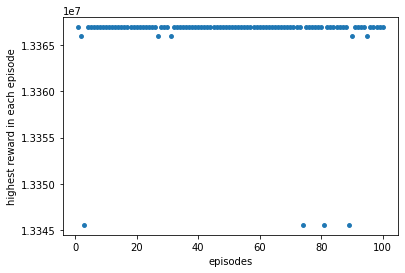

In [3]:
import matplotlib.pyplot as plt
print('Hightest reward',reward_table[:,:,0].max())

x_steps=np.arange(1,max_steps+1,1)
x_episodes=np.arange(1,MAX_EPISODES+1,1)
plt.scatter(x_episodes,reward_table[:,:,0].max(axis=1),s=15)
plt.xlabel('episodes')
plt.ylabel('highest reward in each episode')

In [31]:
def visualize_episode(episode,scale=1, color_idx = np.linspace(0, 1, 100)):
  #plt.scatter(x_steps,reward_table[episode],s=15,label='episode #{}'.format(episode))
  plt.plot(x_steps,reward_table[episode,:,0],label='episode #{}'.format(episode),color=plt.cm.cool(color_idx[episode//scale]))
  plt.xlabel('steps')
  plt.ylabel('reward')
  #plt.yscale('log')
  #plt.legend()
  return None

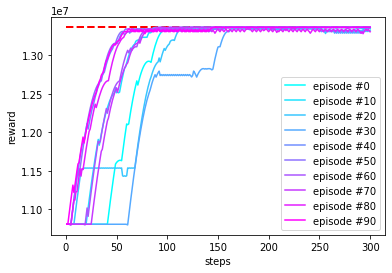

In [46]:
for i in range(100):
  if i%10==0:
    visualize_episode(i,scale=10,color_idx = np.linspace(0, 1, 10))
plt.hlines(y=reward_table.max(),xmin=0,xmax=300,colors='red',linestyle='--',linewidth=2)
plt.legend()
#plt.xlim(0,300)
plt.savefig("10episodes.pdf")

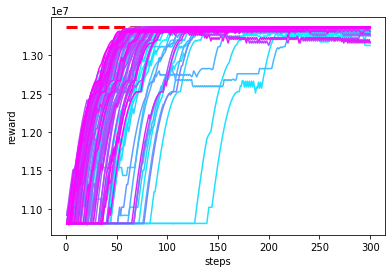

In [6]:
for i in range(100):
  visualize_episode(i)
plt.hlines(y=reward_table.max(),xmin=0,xmax=300,colors='red',linestyle='--',linewidth=3)
#plt.legend()

(13360000.0, 13370000.0)

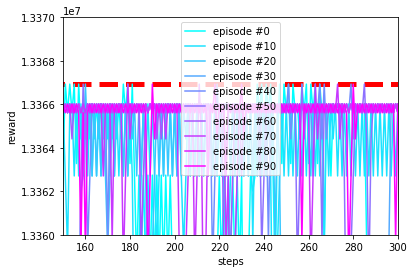

In [7]:

for i in range(100):
  if i%10==0:
    visualize_episode(i,scale=10,color_idx = np.linspace(0, 1, 10))
plt.hlines(y=reward_table.max(),xmin=0,xmax=300,colors='red',linestyle='--',linewidth=5)
plt.legend(loc=0)


plt.xlim(150,300)
plt.ylim(1.336e7,1.337e7)

In [ ]:
#https://stackoverflow.com/questions/48541040/saving-figures-using-plt-savefig-on-colaboratory/49032887

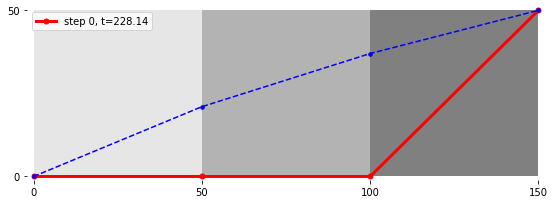

In [59]:
import matplotlib.patches as patches

def draw_lightpath(reward_table,episode,step):
  air = patches.Rectangle((0,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.9,0.9,0.9))
  water= patches.Rectangle((50,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.7,0.7,0.7))
  glass= patches.Rectangle((100,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.5,0.5,0.5))
  fig=plt.figure(figsize=(9,3))
  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
  ax.spines["top"].set_linewidth(0)
  ax.spines["left"].set_linewidth(0)
  ax.spines["right"].set_linewidth(0)
  ax.spines["bottom"].set_linewidth(0)
  ax.add_patch(air)
  ax.add_patch(water)
  ax.add_patch(glass)
  ax.set_xticks((0,50,100,150))
  ax.set_yticks((0,50))
  ax.set_xlim(-2,152)
  ax.set_ylim(-1,51)
  ax.plot([0,50,100,150],[0,reward_table[episode,step,1],reward_table[episode,step,2],50],color='r',linewidth=3,marker='.',markersize=10,label='step {}, t={:.2f}'.format(step,reward_table[episode,step,3]))
  ax.plot([0,50,100,150],[0,21,37,50],color='b',linewidth=1.5,marker='.',markersize=7,linestyle='--')
  ax.legend(loc=0)

  return None
draw_lightpath(reward_table,0,0)

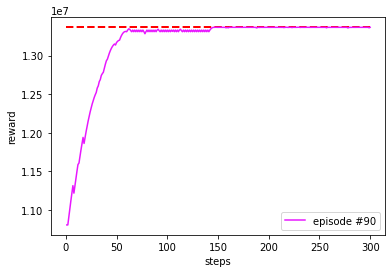

In [114]:
visualize_episode(90)
plt.hlines(y=reward_table.max(),xmin=0,xmax=300,colors='red',linestyle='--',linewidth=2)
#plt.xlim(0,300)
plt.legend()
plt.savefig("episode90curve.pdf")

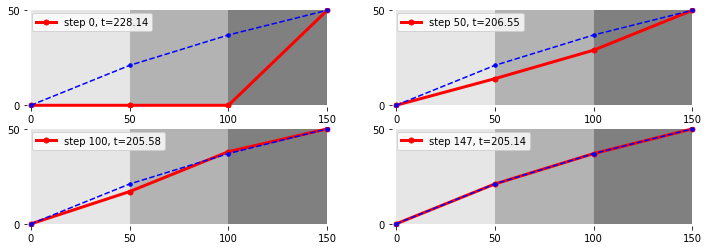

In [129]:
def draw_lightpath_subplot(reward_table,episode,step,index):
  air = patches.Rectangle((0,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.9,0.9,0.9))
  water= patches.Rectangle((50,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.7,0.7,0.7))
  glass= patches.Rectangle((100,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.5,0.5,0.5))
  ax = fig.add_subplot(2,2,index+1)
  ax.spines["top"].set_linewidth(0)
  ax.spines["left"].set_linewidth(0)
  ax.spines["right"].set_linewidth(0)
  ax.spines["bottom"].set_linewidth(0)
  ax.add_patch(air)
  ax.add_patch(water)
  ax.add_patch(glass)
  ax.set_xticks((0,50,100,150))
  ax.set_yticks((0,50))
  ax.set_xlim(-2,152)
  ax.set_ylim(-1,51)
  ax.plot([0,50,100,150],[0,reward_table[episode,step,1],reward_table[episode,step,2],50],color='r',linewidth=3,marker='.',markersize=10,label='step {}, t={:.2f}'.format(step,reward_table[episode,step,3]))
  ax.plot([0,50,100,150],[0,21,37,50],color='b',linewidth=1.5,marker='.',markersize=7,linestyle='--')
  ax.legend(loc=0)

  return None
fig=plt.figure(figsize=(12,4))
for i,step in enumerate((0,50,100,147)):
  draw_lightpath_subplot(reward_table,90,step,i)
plt.savefig('4steps.pdf')

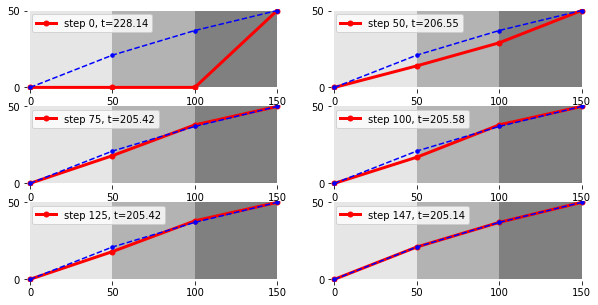

In [130]:
def draw_lightpath_subplot(reward_table,episode,step,index):
  air = patches.Rectangle((0,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.9,0.9,0.9))
  water= patches.Rectangle((50,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.7,0.7,0.7))
  glass= patches.Rectangle((100,0),50,50,linewidth=1,edgecolor='None',facecolor=(0.5,0.5,0.5))
  ax = fig.add_subplot(3,2,index+1)
  ax.spines["top"].set_linewidth(0)
  ax.spines["left"].set_linewidth(0)
  ax.spines["right"].set_linewidth(0)
  ax.spines["bottom"].set_linewidth(0)
  ax.add_patch(air)
  ax.add_patch(water)
  ax.add_patch(glass)
  ax.set_xticks((0,50,100,150))
  ax.set_yticks((0,50))
  ax.set_xlim(-2,152)
  ax.set_ylim(-1,51)
  ax.plot([0,50,100,150],[0,reward_table[episode,step,1],reward_table[episode,step,2],50],color='r',linewidth=3,marker='.',markersize=10,label='step {}, t={:.2f}'.format(step,reward_table[episode,step,3]))
  ax.plot([0,50,100,150],[0,21,37,50],color='b',linewidth=1.5,marker='.',markersize=7,linestyle='--')
  ax.legend(loc=0)

  return None
fig=plt.figure(figsize=(10,5))
for i,step in enumerate((0,50,75,100,125,147)):
  draw_lightpath_subplot(reward_table,90,step,i)
plt.savefig('6steps.pdf')

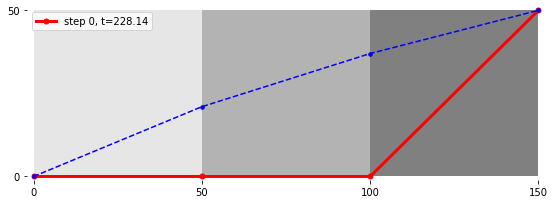

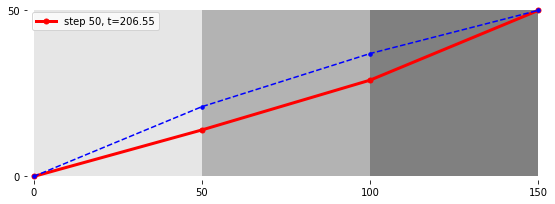

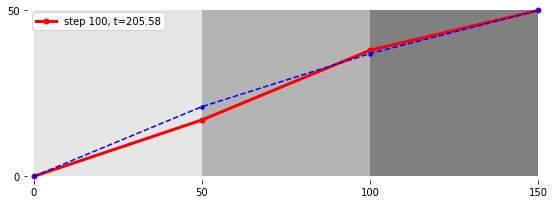

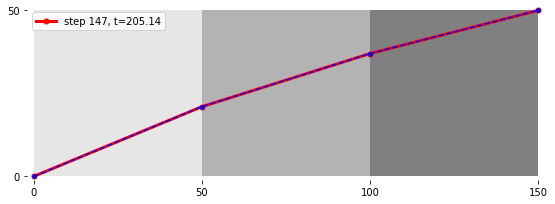

In [109]:
for i in (0,50,100,147):
  draw_lightpath(reward_table,90,i)

In [17]:
from google.colab import files
#plt.savefig("abc.png")
#files.download("abc.png")

In [131]:
files.download("episode90curve.pdf")
files.download("10episodes.pdf")
files.download("4steps.pdf")
files.download("6steps.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>